In [ ]:
##Firstly in this step did all the imports so that I can see all the imports that i
##have done at single place and can do some modifications when needed
##Also loaded the necessary dataset i.e Cras_Reporting_-_Drivers_Data.csv

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_csv('Crash_Reporting_-_Drivers_Data (1).csv' , low_memory = False )

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184897 entries, 0 to 184896
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  184897 non-null  object 
 1   Local Case Number              184897 non-null  object 
 2   Agency Name                    184897 non-null  object 
 3   ACRS Report Type               184897 non-null  object 
 4   Crash Date/Time                184897 non-null  object 
 5   Route Type                     166756 non-null  object 
 6   Road Name                      166189 non-null  object 
 7   Cross-Street Name              161018 non-null  object 
 8   Off-Road Description           17103 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           5899 non-null    object 
 11  Collision Type                 184312 non-null  object 
 12  Weather                       

In [291]:
df.columns = (['Report Number', 'Local Case Number', 'Agency_Name', 'ACRS Report Type',
       'Crash_Date_Time', 'Route_|Type', 'Road_Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault',
       'Injury Severity', 'Circumstance', 'Driver Distracted By',
       'Drivers_License_State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location'])

In [ ]:
##In the Above cell as some of the columns have gaps in between that may result in errors
##While performing some functions like grouoby and etc

In [293]:
df.head()

,Report Number,Local Case Number,Agency_Name,ACRS Report Type,Crash_Date_Time,Route_|Type,Road_Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,2021-05-27 19:40:00,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,2015-09-11 13:29:00,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,2018-08-17 14:25:00,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,2023-08-11 18:00:00,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,2023-12-06 18:42:00,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"


In [ ]:
##In the Below cell I have converted the Crash_Date_Time column to datatype of datetime from obj

In [295]:
df['Crash_Date_Time'] = pd.to_datetime(df['Crash_Date_Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [ ]:
##In the below cell I have filtered the year of accidents to th eyear 2024 as i thought the recent
##crashes that have been occered in this year are enough as there is a lot of data in the dataset

In [297]:
df_2024 = df[df['Crash_Date_Time'].dt.year == 2024]

In [299]:
df_2024

,Report Number,Local Case Number,Agency_Name,ACRS Report Type,Crash_Date_Time,Route_|Type,Road_Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
1447,MCP3170003V,240000438,Montgomery County Police,Property Damage Crash,2024-01-03 14:55:00,NaN,NaN,NaN,IN FRONT OF 18900 BIRDSEYE DR,NaN,...,North,0,No,No,2015,FRHT,BU,39.165005,-77.249310,"(39.16500483, -77.24931)"
8354,MCP3170003V,240000438,Montgomery County Police,Property Damage Crash,2024-01-03 14:55:00,NaN,NaN,NaN,IN FRONT OF 18900 BIRDSEYE DR,NaN,...,South,0,No,No,2017,LEXUS,SUV,39.165005,-77.249310,"(39.16500483, -77.24931)"
172060,MCP34000014,240019831,MONTGOMERY,Property Damage Crash,2024-04-28 17:30:00,County Route,HARDING DR,NaN,NaN,NaN,...,Southbound,25,No,No,2012,NISSAN,ALTIMA,39.021944,-77.018300,"(39.02194389, -77.01829961)"
172061,HA24850015,24000424,MCPARK,Property Damage Crash,2024-03-11 11:09:00,Maryland (State) Route,FALLS RD,GLEN RD,NaN,NaN,...,Northbound,35,No,NaN,2023,AUDI,A6,39.046002,-77.191530,"(39.04600169, -77.19152963)"
172062,MCP15500051,240016152,MONTGOMERY,Property Damage Crash,2024-04-07 09:30:00,Maryland (State) Route,CONNECTICUT AVE,NaN,NaN,NaN,...,Northbound,30,No,No,2015,TOYOTA,PRIUS,38.987627,-77.077087,"(38.98762711, -77.07708655)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184892,MCP3105005L,240043217,MONTGOMERY,Injury Crash,2024-09-11 14:57:00,County Route,VILLAGE GREEN CIR,DORSEY MILL DR DORSEY MILL DR (EB/L) OBSERVATI...,NaN,NaN,...,Northbound,35,No,No,2015,TOYOTA,CAMRY,39.205572,-77.264772,"(39.20557181, -77.26477187)"
184893,DM8522002X,240043057,TAKOMA,Property Damage Crash,2024-09-10 17:29:00,Maryland (State) Route,NEW HAMPSHIRE AVE,NaN,NaN,NaN,...,Northbound,35,No,No,2016,KIA,SORENTO,38.985342,-76.988076,"(38.98534175, -76.98807623)"
184894,MCP3372002X,240043450,MONTGOMERY,Property Damage Crash,2024-09-12 18:47:00,County Route,RANDOLPH RD,SELFRIDGE RD,NaN,NaN,...,NaN,35,No,No,2024,LEXUS,RX,39.055363,-77.083560,"(39.05536254, -77.08356049)"
184895,MCP30840079,240043645,MONTGOMERY,Property Damage Crash,2024-09-13 16:47:00,County Route,MONTGOMERY LA,MONTGOMERY LA WOODMONT AVE,NaN,NaN,...,NaN,25,No,No,2017,FORD,TAURUS,38.983479,-77.096067,"(38.98347939, -77.09606711)"


In [ ]:
##In the Below cell I have used the fillna to fill the n/A values to unknown as they are the values
##That the police couldnt grab or know and thought of changing the term to unknown is meaningful.

In [301]:
df_2024.fillna('Unknown')

,Report Number,Local Case Number,Agency_Name,ACRS Report Type,Crash_Date_Time,Route_|Type,Road_Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
1447,MCP3170003V,240000438,Montgomery County Police,Property Damage Crash,2024-01-03 14:55:00,Unknown,Unknown,Unknown,IN FRONT OF 18900 BIRDSEYE DR,Unknown,...,North,0,No,No,2015,FRHT,BU,39.165005,-77.249310,"(39.16500483, -77.24931)"
8354,MCP3170003V,240000438,Montgomery County Police,Property Damage Crash,2024-01-03 14:55:00,Unknown,Unknown,Unknown,IN FRONT OF 18900 BIRDSEYE DR,Unknown,...,South,0,No,No,2017,LEXUS,SUV,39.165005,-77.249310,"(39.16500483, -77.24931)"
172060,MCP34000014,240019831,MONTGOMERY,Property Damage Crash,2024-04-28 17:30:00,County Route,HARDING DR,Unknown,Unknown,Unknown,...,Southbound,25,No,No,2012,NISSAN,ALTIMA,39.021944,-77.018300,"(39.02194389, -77.01829961)"
172061,HA24850015,24000424,MCPARK,Property Damage Crash,2024-03-11 11:09:00,Maryland (State) Route,FALLS RD,GLEN RD,Unknown,Unknown,...,Northbound,35,No,Unknown,2023,AUDI,A6,39.046002,-77.191530,"(39.04600169, -77.19152963)"
172062,MCP15500051,240016152,MONTGOMERY,Property Damage Crash,2024-04-07 09:30:00,Maryland (State) Route,CONNECTICUT AVE,Unknown,Unknown,Unknown,...,Northbound,30,No,No,2015,TOYOTA,PRIUS,38.987627,-77.077087,"(38.98762711, -77.07708655)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184892,MCP3105005L,240043217,MONTGOMERY,Injury Crash,2024-09-11 14:57:00,County Route,VILLAGE GREEN CIR,DORSEY MILL DR DORSEY MILL DR (EB/L) OBSERVATI...,Unknown,Unknown,...,Northbound,35,No,No,2015,TOYOTA,CAMRY,39.205572,-77.264772,"(39.20557181, -77.26477187)"
184893,DM8522002X,240043057,TAKOMA,Property Damage Crash,2024-09-10 17:29:00,Maryland (State) Route,NEW HAMPSHIRE AVE,Unknown,Unknown,Unknown,...,Northbound,35,No,No,2016,KIA,SORENTO,38.985342,-76.988076,"(38.98534175, -76.98807623)"
184894,MCP3372002X,240043450,MONTGOMERY,Property Damage Crash,2024-09-12 18:47:00,County Route,RANDOLPH RD,SELFRIDGE RD,Unknown,Unknown,...,Unknown,35,No,No,2024,LEXUS,RX,39.055363,-77.083560,"(39.05536254, -77.08356049)"
184895,MCP30840079,240043645,MONTGOMERY,Property Damage Crash,2024-09-13 16:47:00,County Route,MONTGOMERY LA,MONTGOMERY LA WOODMONT AVE,Unknown,Unknown,...,Unknown,25,No,No,2017,FORD,TAURUS,38.983479,-77.096067,"(38.98347939, -77.09606711)"


In [303]:
df_2024.dtypes

Report Number                            object
Local Case Number                        object
Agency_Name                              object
ACRS Report Type                         object
Crash_Date_Time                  datetime64[ns]
Route_|Type                              object
Road_Name                                object
Cross-Street Name                        object
Off-Road Description                     object
Municipality                             object
Related Non-Motorist                     object
Collision Type                           object
Weather                                  object
Surface Condition                        object
Light                                    object
Traffic Control                          object
Driver Substance Abuse                   object
Non-Motorist Substance Abuse             object
Person ID                                object
Driver At Fault                          object
Injury Severity                         

In [305]:
df_2024.reset_index()

,index,Report Number,Local Case Number,Agency_Name,ACRS Report Type,Crash_Date_Time,Route_|Type,Road_Name,Cross-Street Name,Off-Road Description,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,1447,MCP3170003V,240000438,Montgomery County Police,Property Damage Crash,2024-01-03 14:55:00,NaN,NaN,NaN,IN FRONT OF 18900 BIRDSEYE DR,...,North,0,No,No,2015,FRHT,BU,39.165005,-77.249310,"(39.16500483, -77.24931)"
1,8354,MCP3170003V,240000438,Montgomery County Police,Property Damage Crash,2024-01-03 14:55:00,NaN,NaN,NaN,IN FRONT OF 18900 BIRDSEYE DR,...,South,0,No,No,2017,LEXUS,SUV,39.165005,-77.249310,"(39.16500483, -77.24931)"
2,172060,MCP34000014,240019831,MONTGOMERY,Property Damage Crash,2024-04-28 17:30:00,County Route,HARDING DR,NaN,NaN,...,Southbound,25,No,No,2012,NISSAN,ALTIMA,39.021944,-77.018300,"(39.02194389, -77.01829961)"
3,172061,HA24850015,24000424,MCPARK,Property Damage Crash,2024-03-11 11:09:00,Maryland (State) Route,FALLS RD,GLEN RD,NaN,...,Northbound,35,No,NaN,2023,AUDI,A6,39.046002,-77.191530,"(39.04600169, -77.19152963)"
4,172062,MCP15500051,240016152,MONTGOMERY,Property Damage Crash,2024-04-07 09:30:00,Maryland (State) Route,CONNECTICUT AVE,NaN,NaN,...,Northbound,30,No,No,2015,TOYOTA,PRIUS,38.987627,-77.077087,"(38.98762711, -77.07708655)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12773,184892,MCP3105005L,240043217,MONTGOMERY,Injury Crash,2024-09-11 14:57:00,County Route,VILLAGE GREEN CIR,DORSEY MILL DR DORSEY MILL DR (EB/L) OBSERVATI...,NaN,...,Northbound,35,No,No,2015,TOYOTA,CAMRY,39.205572,-77.264772,"(39.20557181, -77.26477187)"
12774,184893,DM8522002X,240043057,TAKOMA,Property Damage Crash,2024-09-10 17:29:00,Maryland (State) Route,NEW HAMPSHIRE AVE,NaN,NaN,...,Northbound,35,No,No,2016,KIA,SORENTO,38.985342,-76.988076,"(38.98534175, -76.98807623)"
12775,184894,MCP3372002X,240043450,MONTGOMERY,Property Damage Crash,2024-09-12 18:47:00,County Route,RANDOLPH RD,SELFRIDGE RD,NaN,...,NaN,35,No,No,2024,LEXUS,RX,39.055363,-77.083560,"(39.05536254, -77.08356049)"
12776,184895,MCP30840079,240043645,MONTGOMERY,Property Damage Crash,2024-09-13 16:47:00,County Route,MONTGOMERY LA,MONTGOMERY LA WOODMONT AVE,NaN,...,NaN,25,No,No,2017,FORD,TAURUS,38.983479,-77.096067,"(38.98347939, -77.09606711)"


In [ ]:
##In the Below cell i have filtered the data to the crashes occured on the roads that have
##speedlimit more than 25 as according to my perspective the more the speed is directly 
##proportional to the crashes

In [307]:
df_2024_25 = df_2024[df_2024['Speed Limit'] > 25]
df_2024_25.fillna('Unknown')

,Report Number,Local Case Number,Agency_Name,ACRS Report Type,Crash_Date_Time,Route_|Type,Road_Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
172061,HA24850015,24000424,MCPARK,Property Damage Crash,2024-03-11 11:09:00,Maryland (State) Route,FALLS RD,GLEN RD,Unknown,Unknown,...,Northbound,35,No,Unknown,2023,AUDI,A6,39.046002,-77.191530,"(39.04600169, -77.19152963)"
172062,MCP15500051,240016152,MONTGOMERY,Property Damage Crash,2024-04-07 09:30:00,Maryland (State) Route,CONNECTICUT AVE,Unknown,Unknown,Unknown,...,Northbound,30,No,No,2015,TOYOTA,PRIUS,38.987627,-77.077087,"(38.98762711, -77.07708655)"
172063,MCP31990069,240027272,MONTGOMERY,Property Damage Crash,2024-06-08 13:29:00,Maryland (State) Route,NORBECK RD (WB/L),EMORY LA,Unknown,Unknown,...,Southbound,35,No,Unknown,2014,HYUNDAI,ELANTRA,39.099482,-77.099789,"(39.09948177, -77.09978889)"
172064,MCP3085004Q,240022338,MONTGOMERY,Property Damage Crash,2024-05-12 01:19:00,Maryland (State) Route,RIVER RD (WB/L),Unknown,Unknown,Unknown,...,Westbound,35,No,No,2020,LINCOLN,CONTINENTAL,38.973183,-77.121838,"(38.97318333, -77.12183833)"
172065,MCP3016004Z,240017335,MONTGOMERY,Property Damage Crash,2024-04-14 12:45:00,Maryland (State) Route,GERMANTOWN RD,CRYSTAL ROCK DR,Unknown,Unknown,...,Westbound,45,No,No,2024,HYUNDAI,ELANTRA,39.181006,-77.262142,"(39.18100613, -77.26214161)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184889,MCP287100BC,240043994,MONTGOMERY,Property Damage Crash,2024-09-15 20:00:00,Maryland (State) Route,CONNECTICUT AVE,Unknown,Unknown,Unknown,...,Northbound,35,No,No,2020,HONDA,CR-V,38.971751,-77.077182,"(38.97175087, -77.07718168)"
184891,MCP2674005G,240043659,MONTGOMERY,Injury Crash,2024-09-13 18:53:00,Local Route,RIDGE MANOR DR,BETHESDA CHURCH RD,Unknown,Unknown,...,Unknown,30,No,No,1900,YAMAHA,CV50,39.282859,-77.207597,"(39.282859, -77.20759733)"
184892,MCP3105005L,240043217,MONTGOMERY,Injury Crash,2024-09-11 14:57:00,County Route,VILLAGE GREEN CIR,DORSEY MILL DR DORSEY MILL DR (EB/L) OBSERVATI...,Unknown,Unknown,...,Northbound,35,No,No,2015,TOYOTA,CAMRY,39.205572,-77.264772,"(39.20557181, -77.26477187)"
184893,DM8522002X,240043057,TAKOMA,Property Damage Crash,2024-09-10 17:29:00,Maryland (State) Route,NEW HAMPSHIRE AVE,Unknown,Unknown,Unknown,...,Northbound,35,No,No,2016,KIA,SORENTO,38.985342,-76.988076,"(38.98534175, -76.98807623)"


In [ ]:
##Here What I have done is just wanted to know which agency has registered  record crashes in the
##whole dataset and are the drivers of this state are doing this or else is it the tourists i.e 
##the people who came for a vacation to the state of Maryland and plotted the horizontal graph

In [311]:
df_2024_25[['Agency_Name','Drivers_License_State']].nunique

<bound method DataFrame.nunique of        Agency_Name Drivers_License_State
172061      MCPARK                    MD
172062  MONTGOMERY                    DC
172063  MONTGOMERY                    MD
172064  MONTGOMERY                    VA
172065  MONTGOMERY                    MD
...            ...                   ...
184889  MONTGOMERY                    MD
184891  MONTGOMERY                   NaN
184892  MONTGOMERY                    MD
184893      TAKOMA                   NaN
184894  MONTGOMERY                    MD

[9176 rows x 2 columns]>

Text(0.5, 0, 'Count')

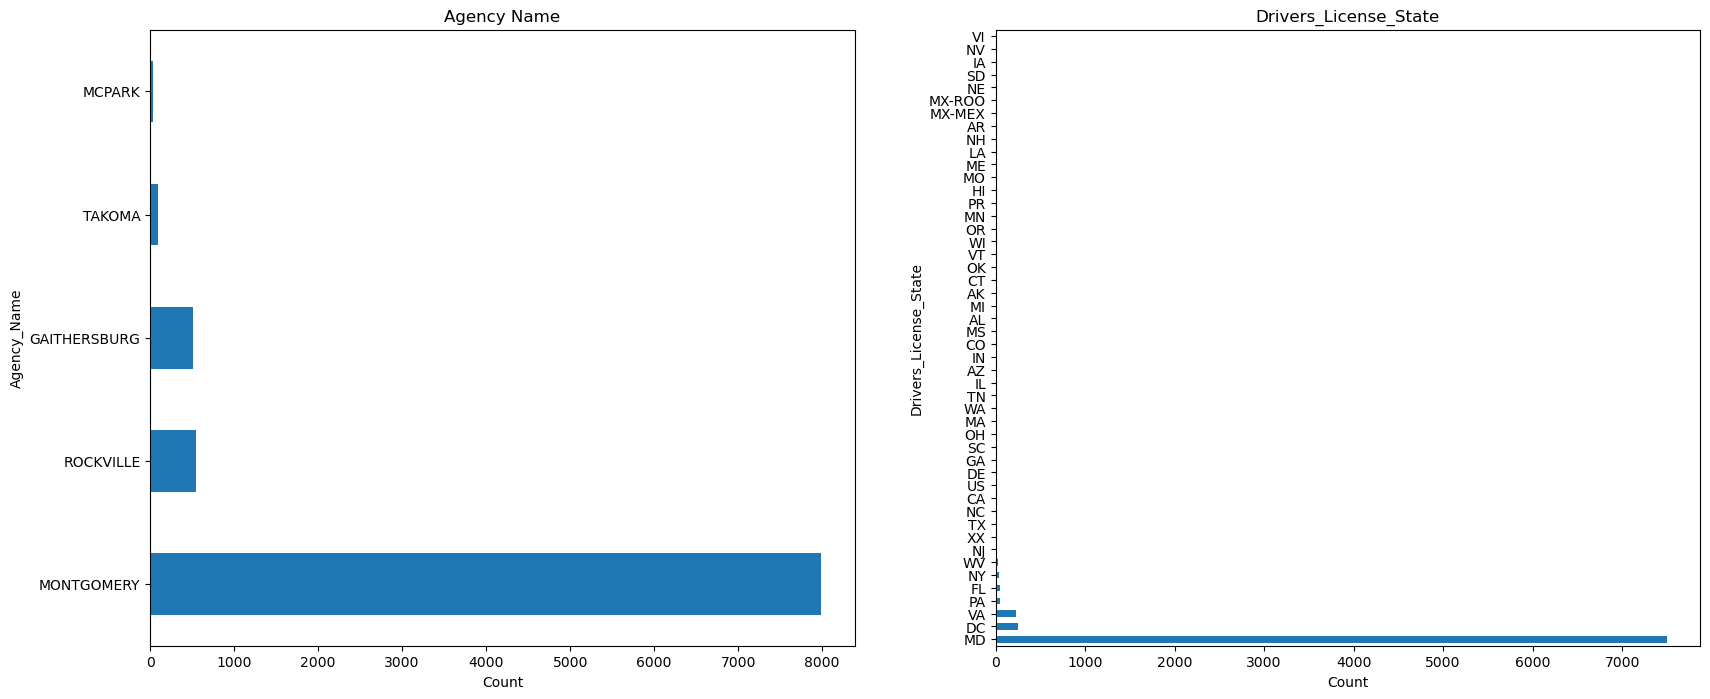

In [313]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
df_2024_25.Agency_Name.value_counts().plot(kind = 'barh' , ax = ax[0])
ax[0].set_title('Agency Name')
ax[0].set_xlabel('Count')
df_2024_25.Drivers_License_State.value_counts().plot(kind = 'barh' , ax = ax[1])
ax[1].set_title('Drivers_License_State')
ax[1].set_xlabel('Count')